In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas
import json
import datetime as dt
import numpy
import os.path as path
import analysis
import time

Imported analysis


In [2]:
def pad_day(day):
    if day < 10:
        day = "0" + str(day)
    return str(day)
path_to_model = "model"
x_dataframes = []
y_dataframes = []
training_data = []
for i in range(1,27):
    
    if(path.exists("datasets/AAPL/AAPL_daily" + str(i) + ".json")):
        print(i)
        x = pandas.read_json(path_or_buf = "datasets/AAPL/AAPL_daily" + str(i) + ".json")
        y = pandas.read_json(path_or_buf = "datasets/AAPL_answer/AAPL_daily_answer" + str(i) + ".json")
        if not x.empty:
            x_dataframes.append(x)
            y_dataframes.append(y["prices"])
            temp_data = analysis.data()

            x = numpy.array( [[j, x["prices"][j]] for j in range(len(x["minute"]))] )
            
            y = y["prices"].values
            print(y)
            temp_data.load_data(x, y)
            
            training_data.append(temp_data)

1
[7.70670e-01 0.00000e+00 2.28910e-01 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 8.16050e-02 6.12585e-01 9.36435e-01 7.65435e-01 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 8.56375e-01 1.00000e+00 1.00000e+00 

In [3]:
run_iterations = 1000
layers = 1
neurons_per_layer = 10

layer_array = [2] + [neurons_per_layer]*layers + [1]
print(layer_array)
model = analysis.model(layer_array, 0.01)

print("Initial result:")

start = time.time()

for i in range(run_iterations):
    model.test([1.00+i, 124.23])

print(model.test([1.00, 124.0]))
end = time.time()
print(end - start, "s")
print(run_iterations/(end - start), "it/s")

[2, 10, 1]
Initial result:
tensor([0.1099], grad_fn=<SigmoidBackward>)
0.07006502151489258 s
14272.456903298693 it/s


In [4]:
model.test([1.00,1.0])

tensor([0.5110], grad_fn=<SigmoidBackward>)

     minute    prices
0         0  0.089477
1         1  0.093874
2         2  0.099544
3         3  0.104668
4         4  0.110395
..      ...       ...
385     385  1.000000
386     386  1.000000
387     387  1.000000
388     388  1.000000
389     389  1.000000

[390 rows x 2 columns]


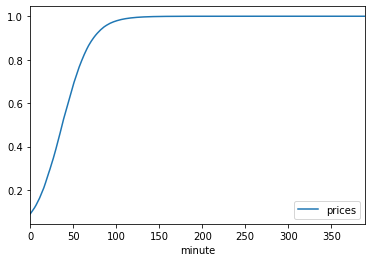

In [5]:
minutes = []
prices = []
for i in range(390):
    minutes.append(i)
    price = x_dataframes[0]["prices"][i].item()
    prices.append(model.test([ i, price ])[0].item())

minutes = pandas.DataFrame({"minute" : minutes})
prices = pandas.DataFrame({"prices" : prices})
df = pandas.concat([minutes, prices], axis=1)
print(df)

p = df.plot(x='minute')
    

In [9]:
start = time.time()
print("Training:")
for tmp in range(10):
    total_loss = 0
    for t in training_data: 
        total_loss += model.fit(t.train_dl, 1)
end = time.time()
print(end - start, "s")

print(model.test([1.00, 124.0]))

Training:
0.639580249786377 s
tensor([0.1099], grad_fn=<SigmoidBackward>)


In [7]:
print(model.basic[1].weight)

Parameter containing:
tensor([[-0.1093, -0.0251,  0.1183, -0.0408,  0.0423,  0.1373,  0.0458, -0.0226,
          0.1092, -0.1265]], requires_grad=True)


     minute    prices
0         0  0.089477
1         1  0.093874
2         2  0.099544
3         3  0.104668
4         4  0.110395
..      ...       ...
385     385  1.000000
386     386  1.000000
387     387  1.000000
388     388  1.000000
389     389  1.000000

[390 rows x 2 columns]


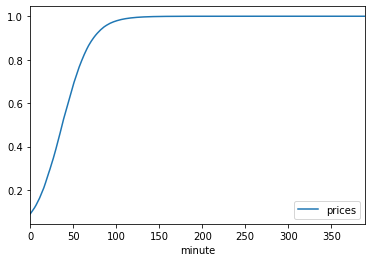

In [8]:
minutes = []
prices = []
for i in range(390):
    minutes.append(i)
    price = x_dataframes[0]["prices"][i].item()
    prices.append(model.test([ i, price ])[0].item())

minutes = pandas.DataFrame({"minute" : minutes})
prices = pandas.DataFrame({"prices" : prices})
df = pandas.concat([minutes, prices], axis=1)
print(df)

p = df.plot(x='minute')